2024-04-09 03:27:47.531040: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-09 03:27:47.534255: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-09 03:27:47.571479: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-09 03:27:49.183816: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


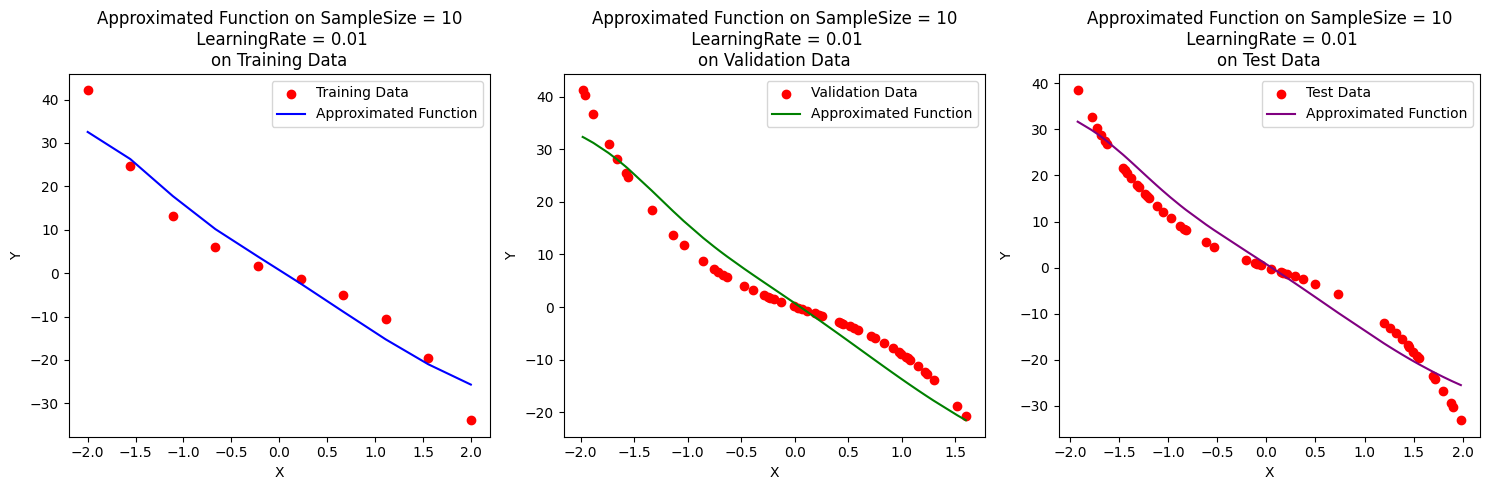

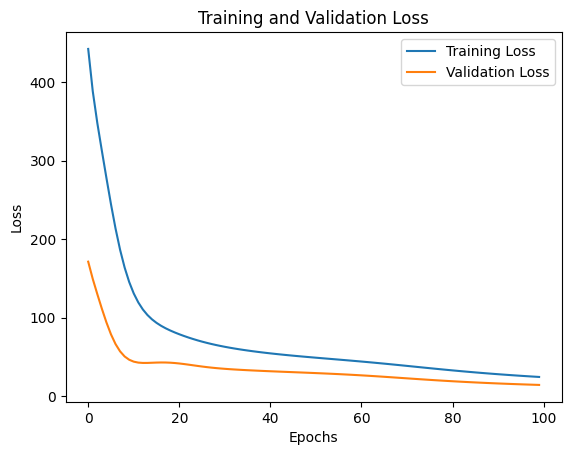

Train Loss: 24.236682891845703
Validation Loss: 14.428858757019043
Test Loss: 11.963696479797363


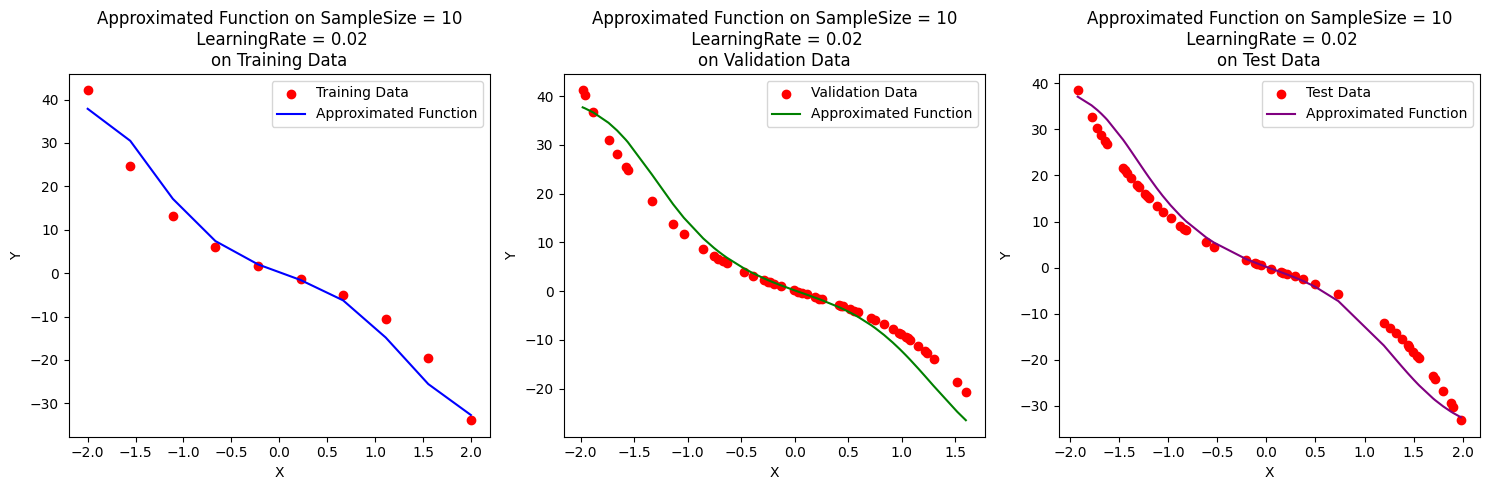

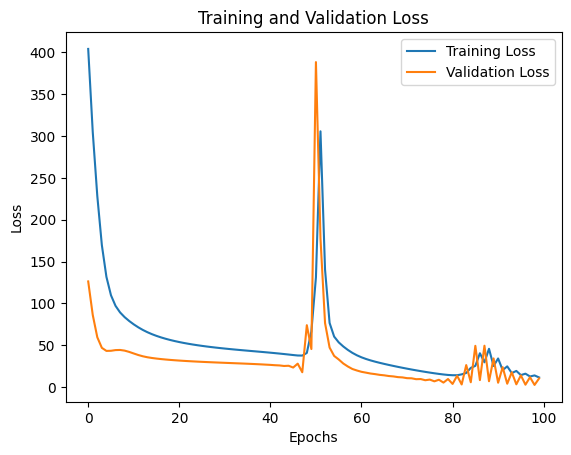

Train Loss: 12.455245971679688
Validation Loss: 10.21937084197998
Test Loss: 16.640554428100586


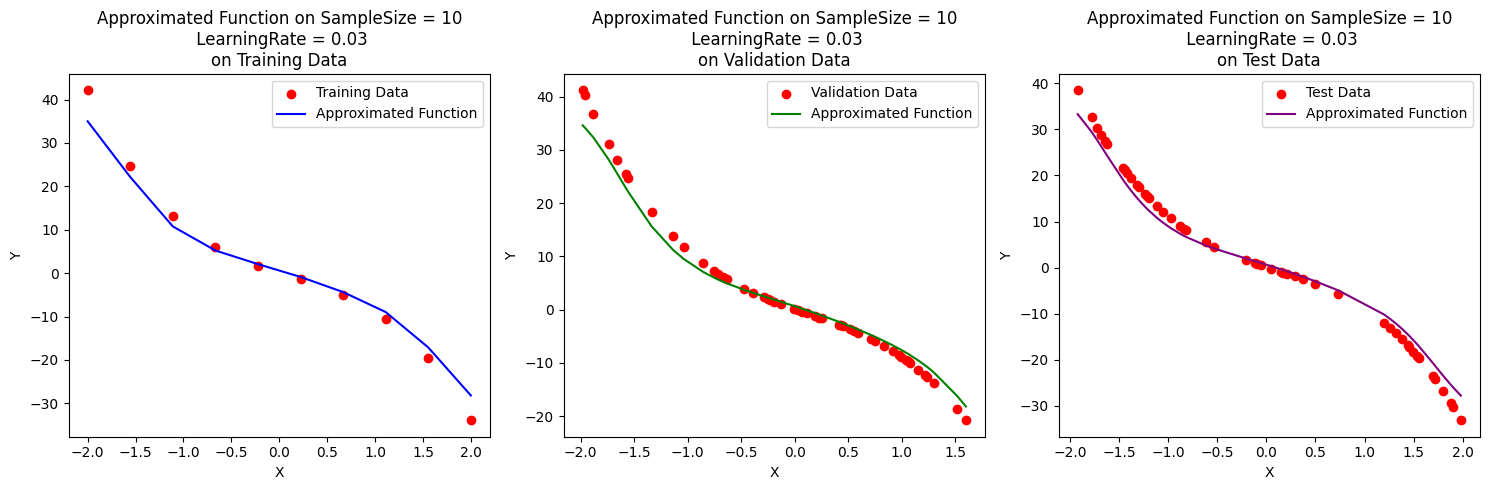

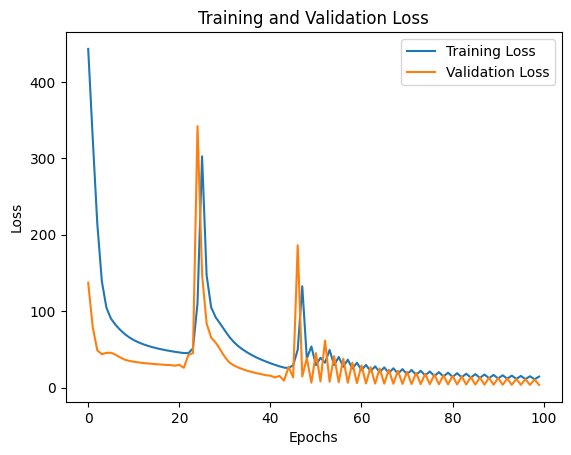

Train Loss: 10.642669677734375
Validation Loss: 3.5632917881011963
Test Loss: 6.240134239196777


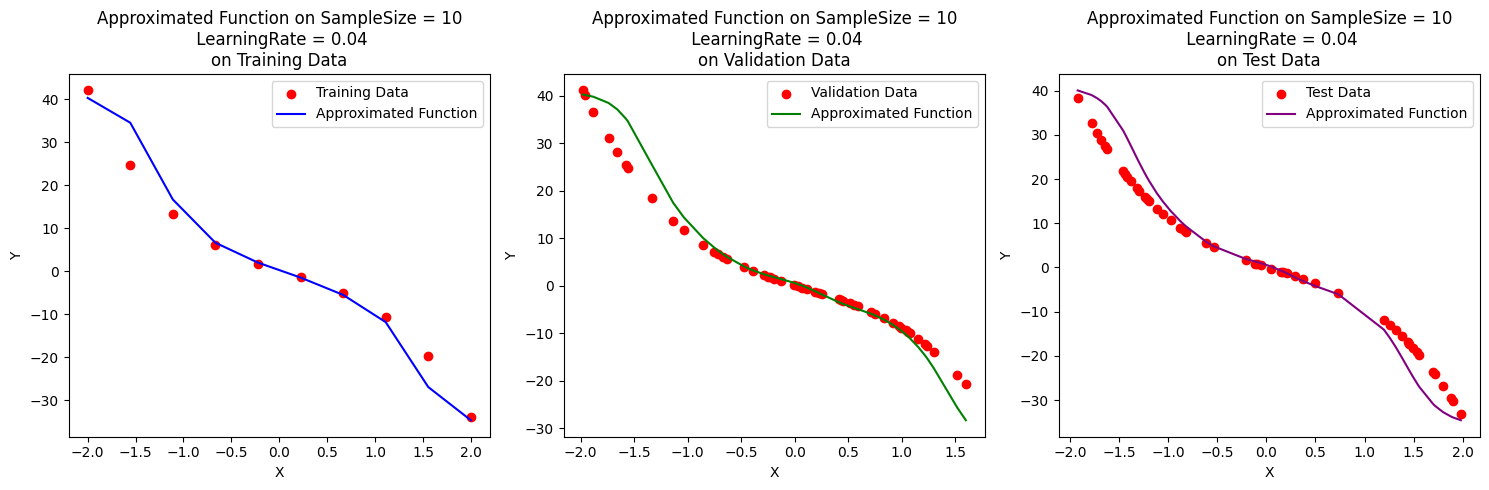

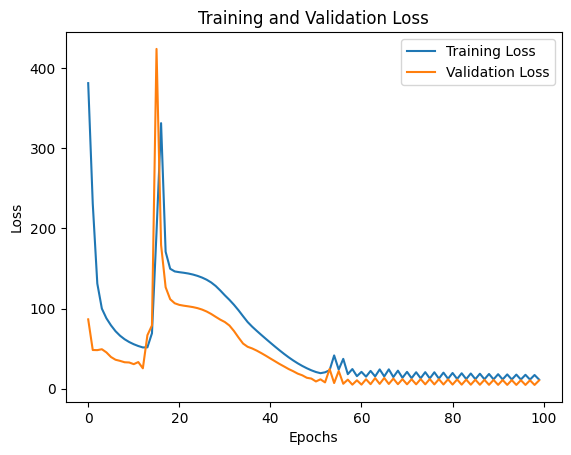

Train Loss: 16.882522583007812
Validation Loss: 10.38668155670166
Test Loss: 25.845794677734375


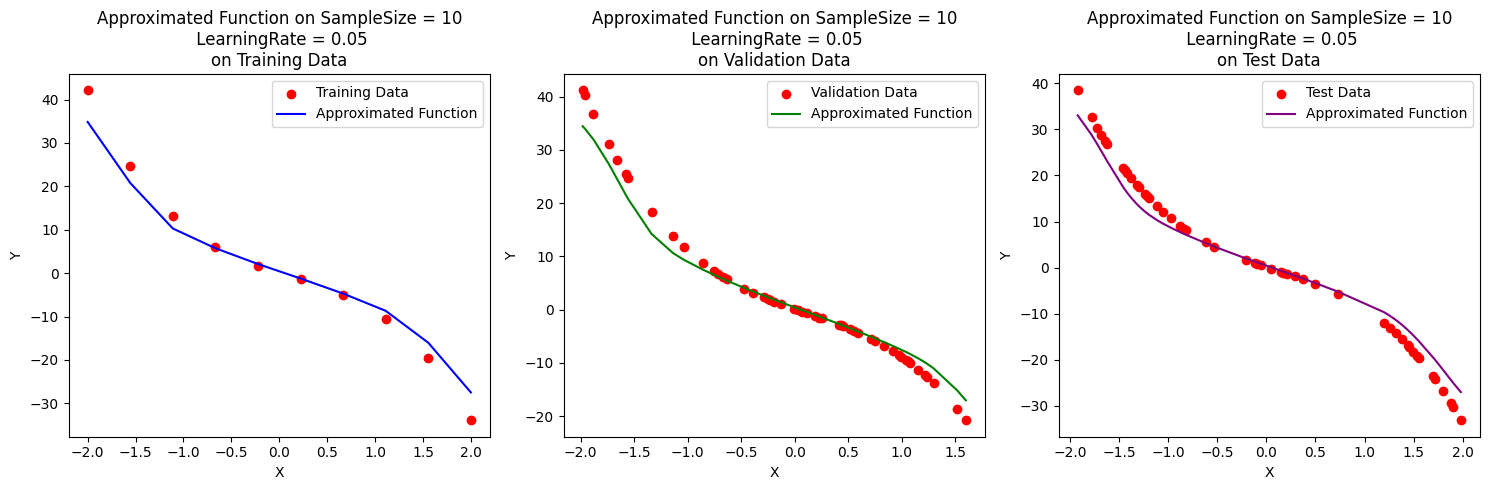

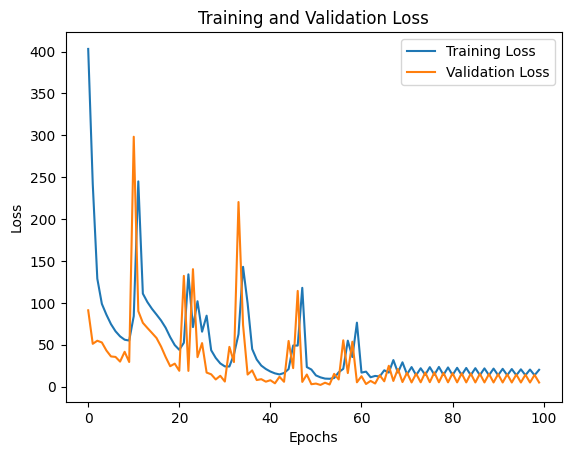

Train Loss: 13.5101900100708
Validation Loss: 4.8904924392700195
Test Loss: 10.700711250305176


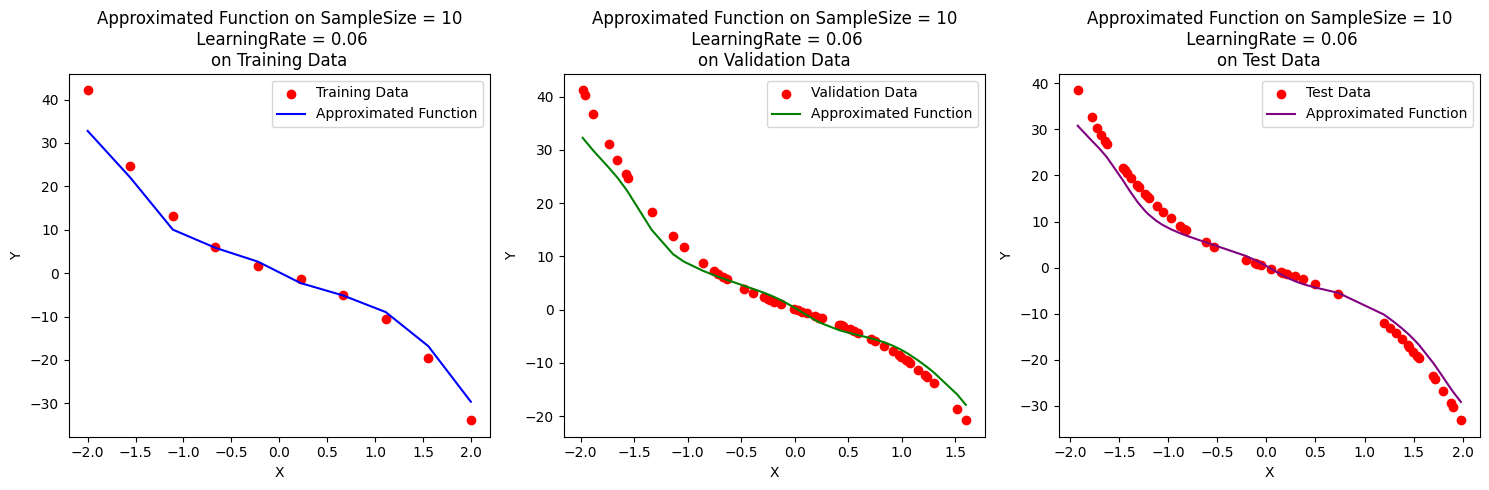

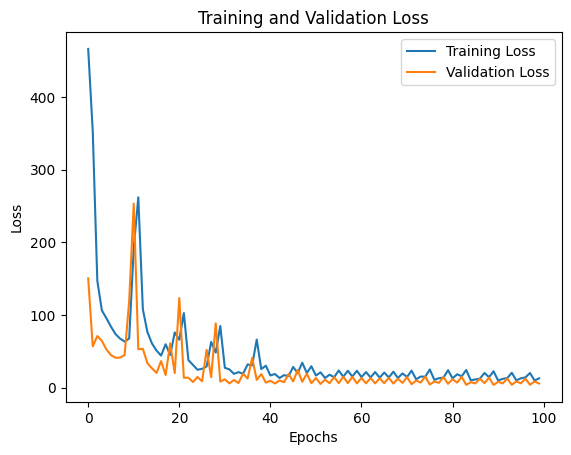

Train Loss: 13.497848510742188
Validation Loss: 5.6344404220581055
Test Loss: 7.372313499450684


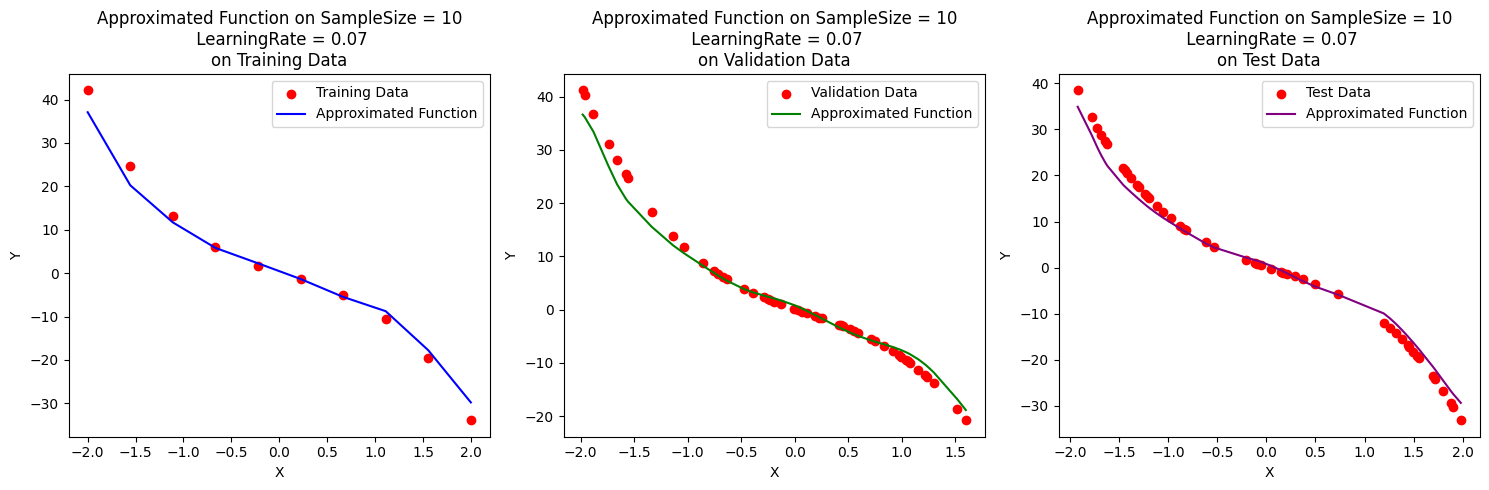

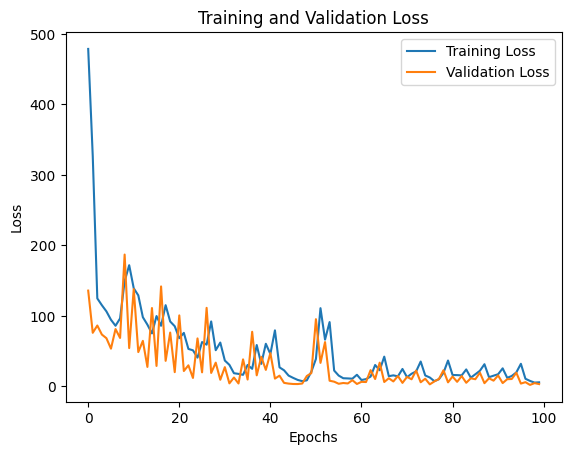

Train Loss: 7.163808345794678
Validation Loss: 3.240898370742798
Test Loss: 5.169289588928223


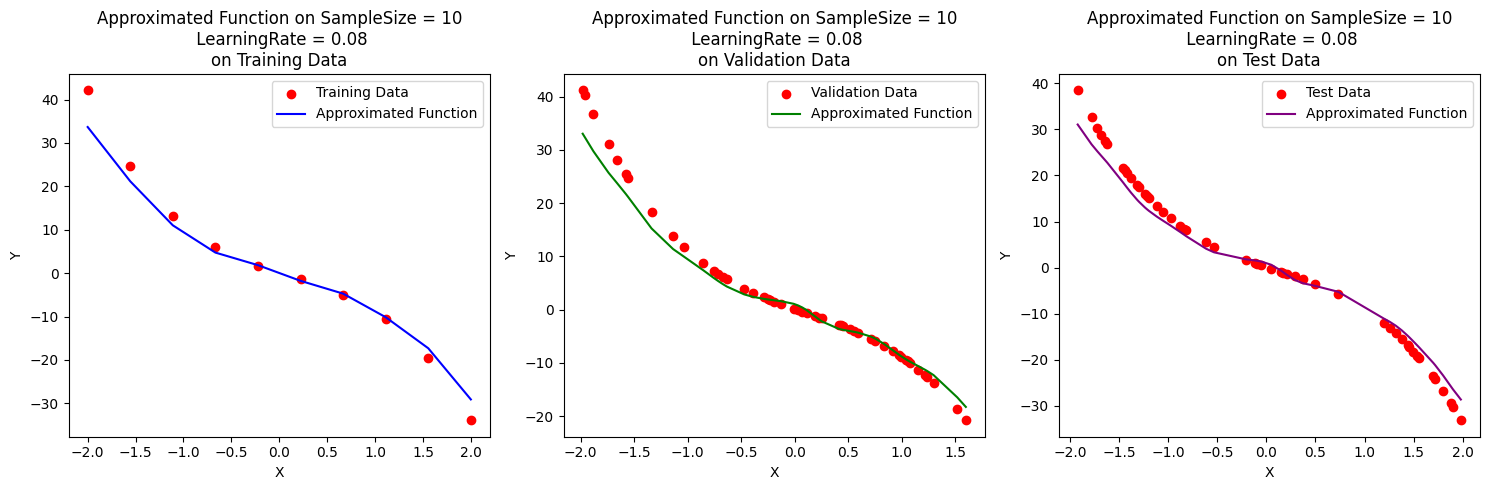

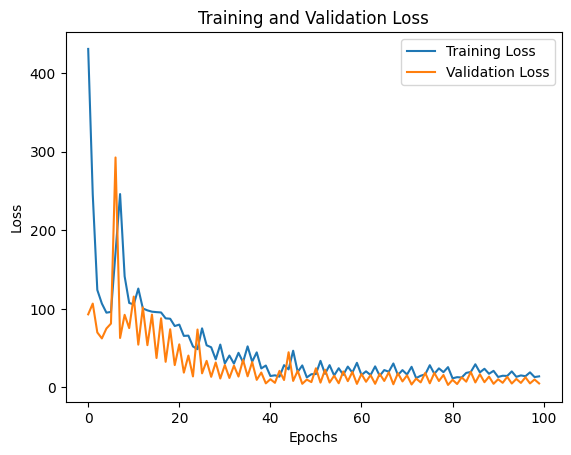

Train Loss: 11.927338600158691
Validation Loss: 4.940174102783203
Test Loss: 7.391188144683838


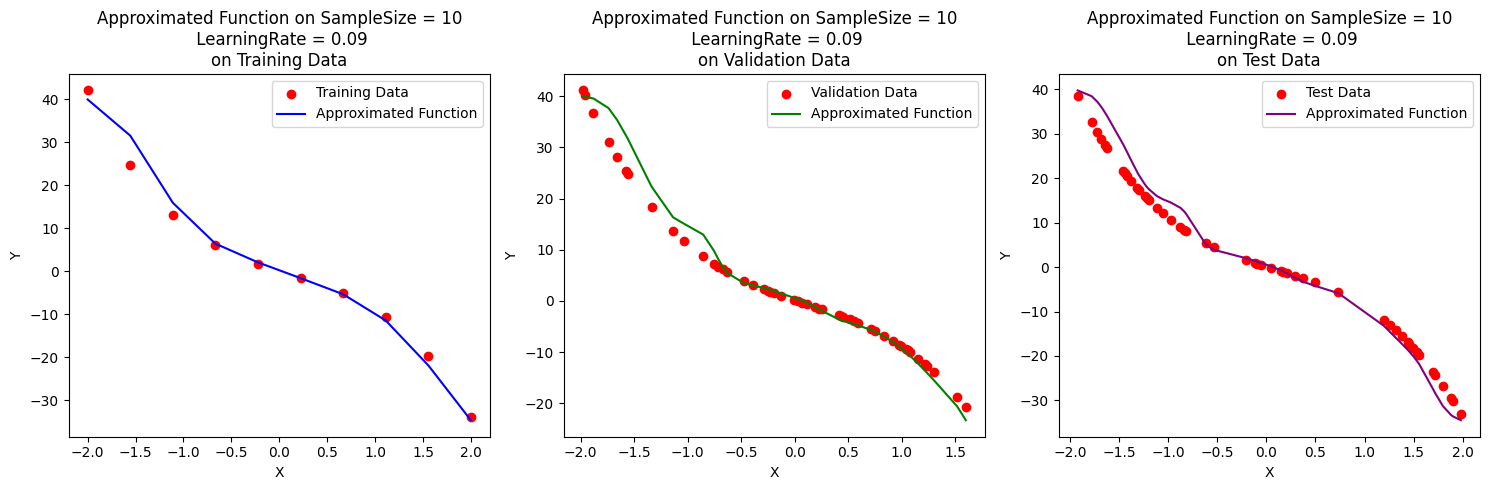

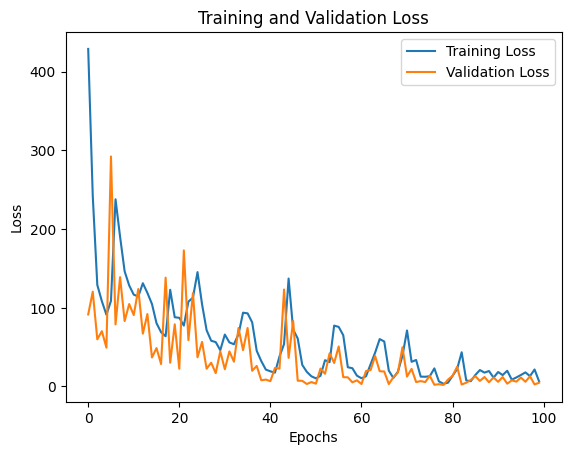

Train Loss: 6.56591272354126
Validation Loss: 4.75398588180542
Test Loss: 10.73299789428711


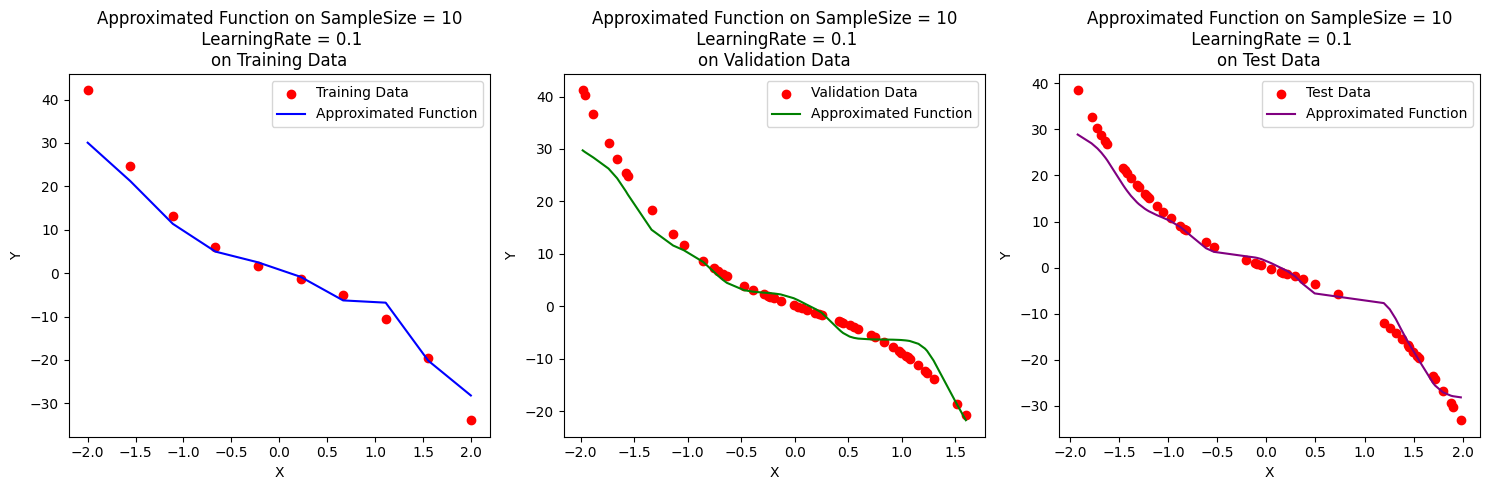

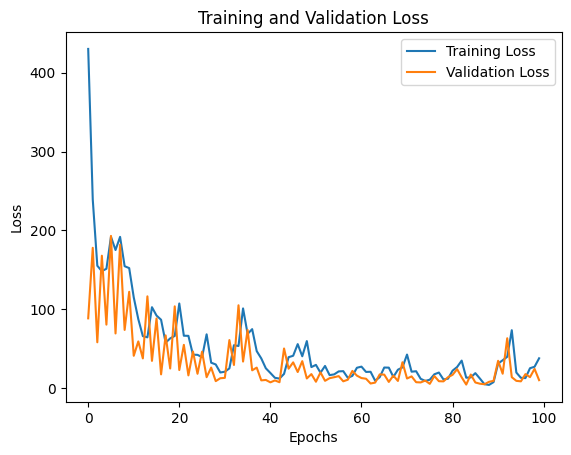

Train Loss: 21.13932991027832
Validation Loss: 9.964491844177246
Test Loss: 7.488438606262207


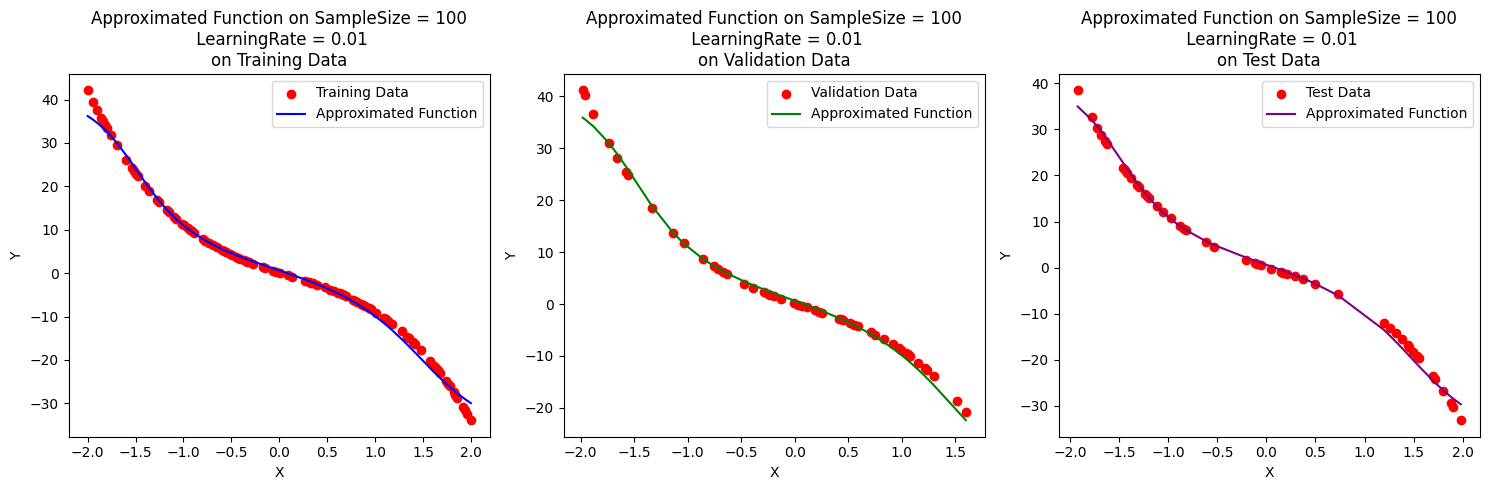

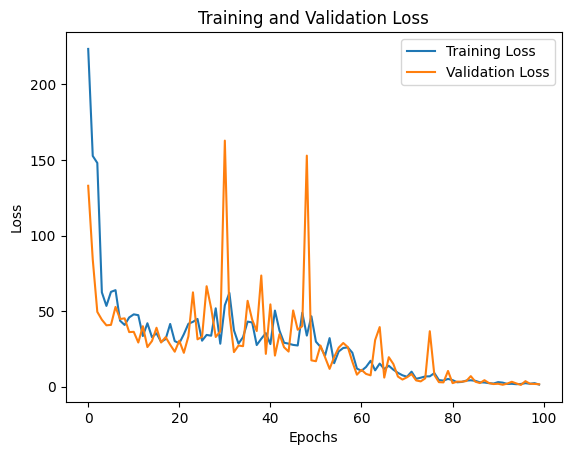

Train Loss: 3.224571466445923
Validation Loss: 1.6266627311706543
Test Loss: 1.6755332946777344


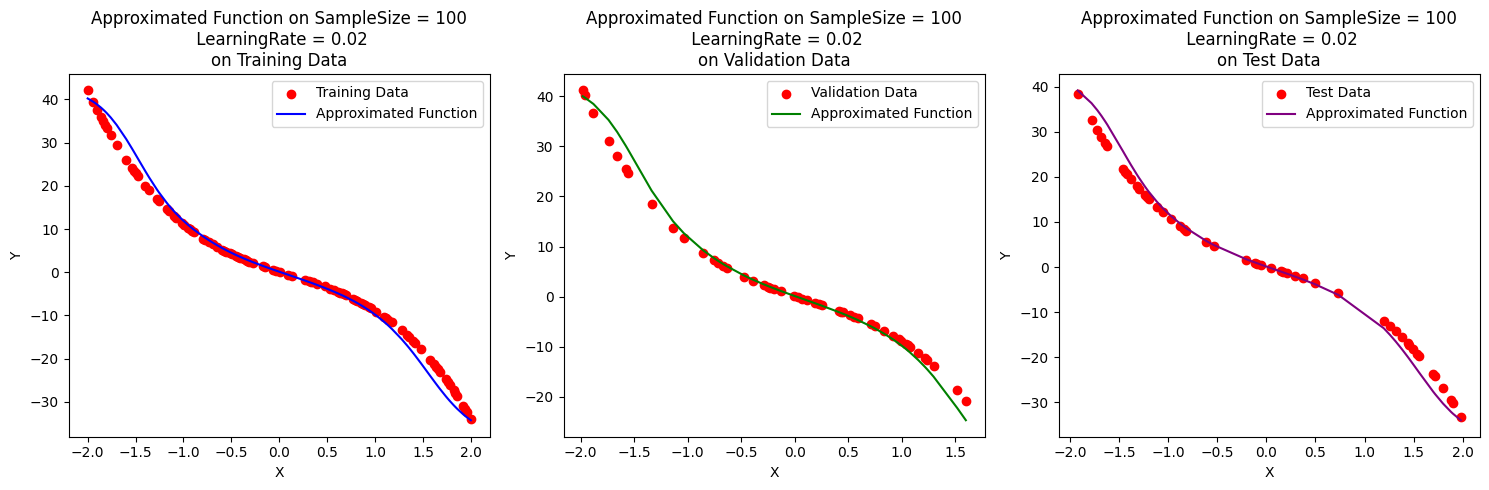

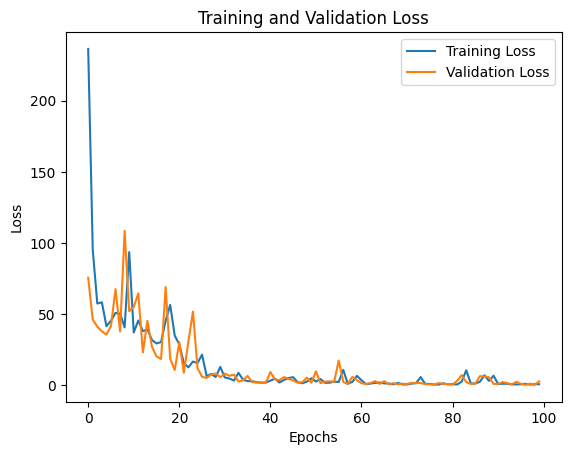

Train Loss: 3.8131771087646484
Validation Loss: 2.8705220222473145
Test Loss: 6.529463768005371


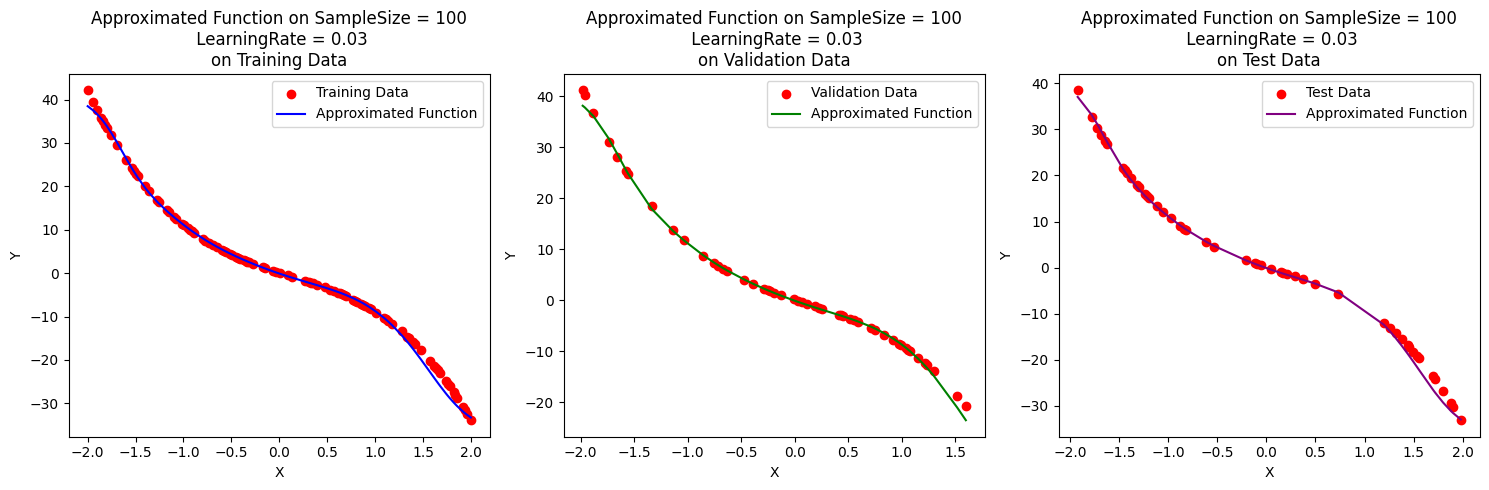

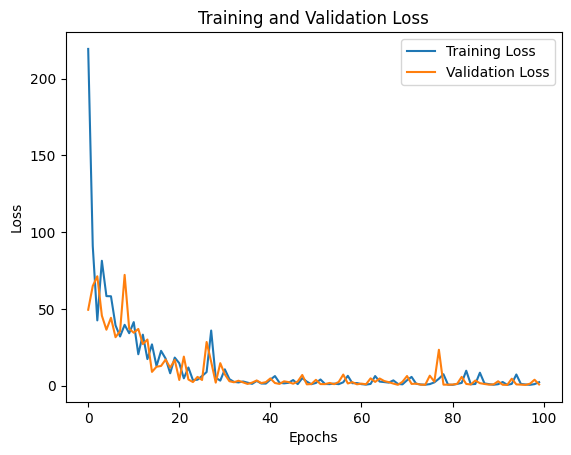

Train Loss: 1.0210061073303223
Validation Loss: 0.6905193328857422
Test Loss: 1.6905461549758911


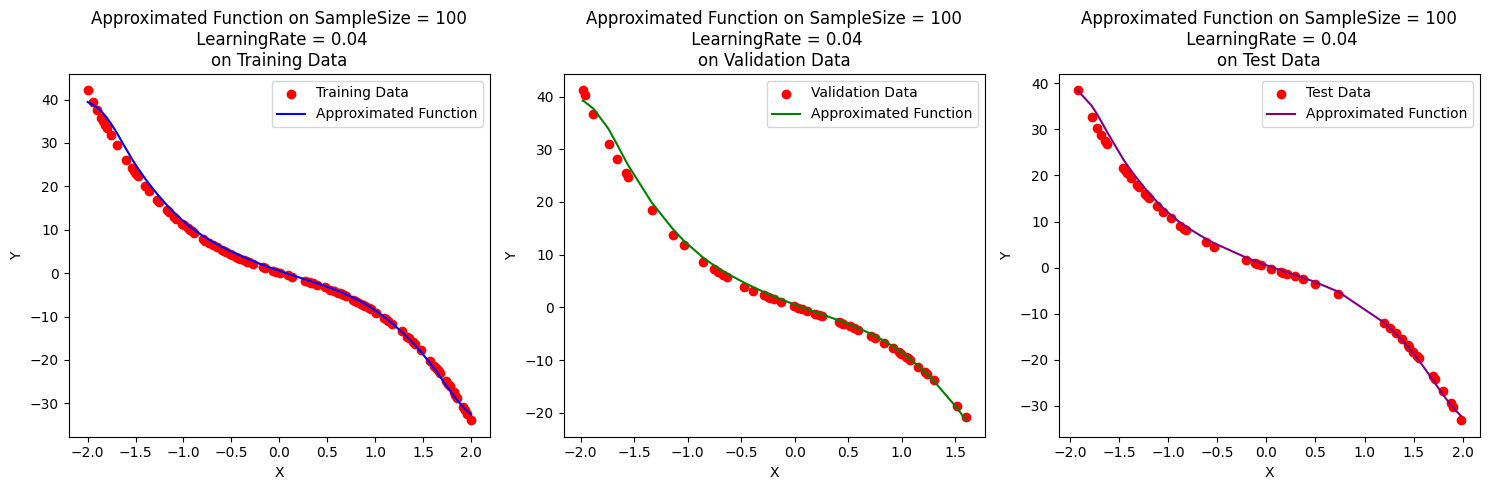

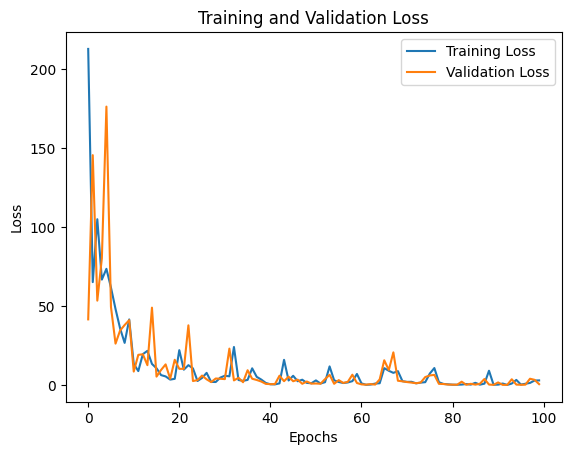

Train Loss: 0.9285284280776978
Validation Loss: 0.7455762028694153
Test Loss: 1.145290732383728


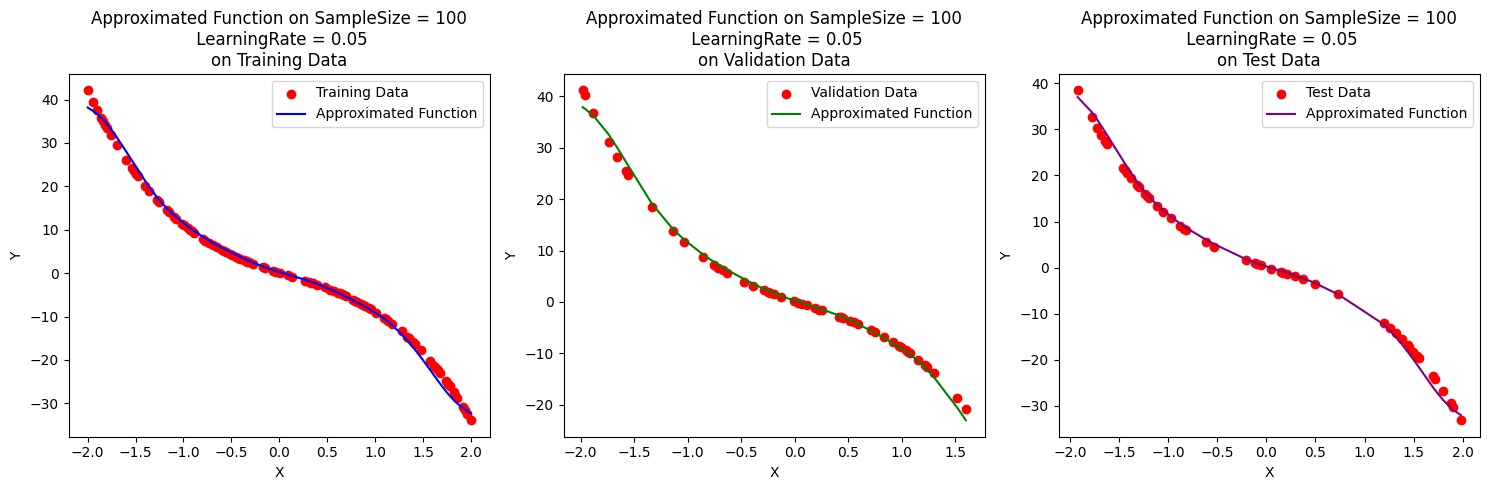

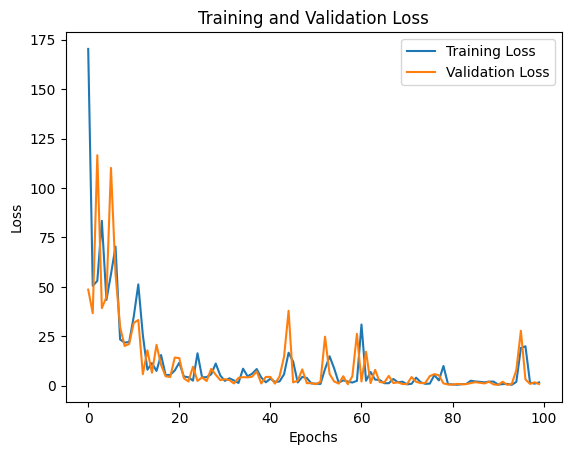

Train Loss: 1.0690112113952637
Validation Loss: 0.8104667067527771
Test Loss: 1.4422228336334229


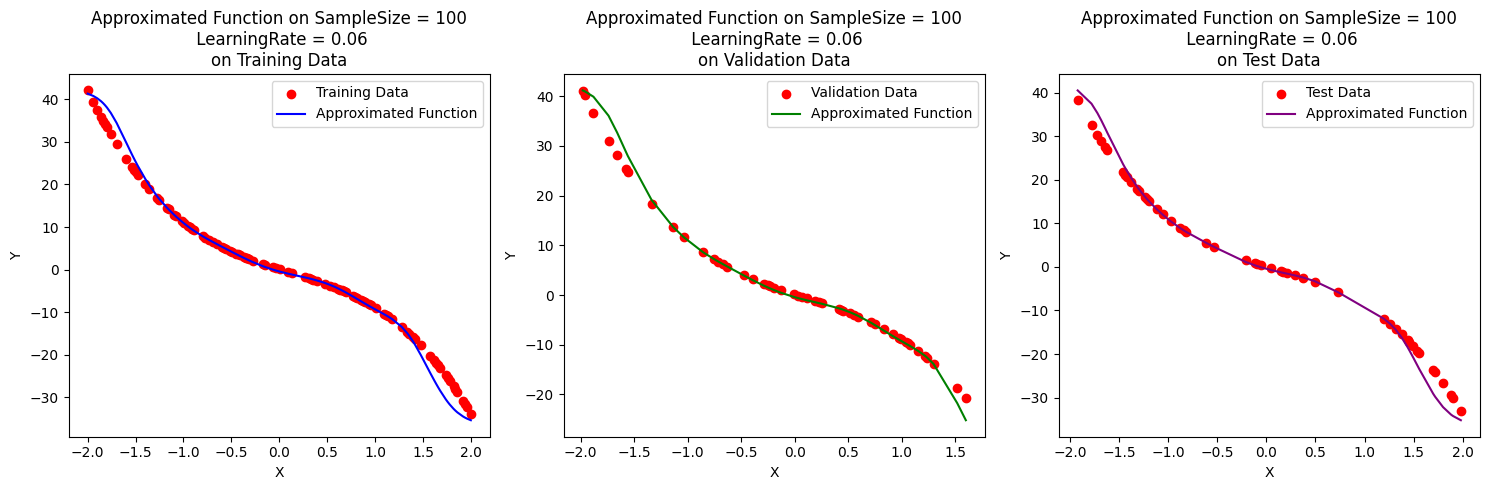

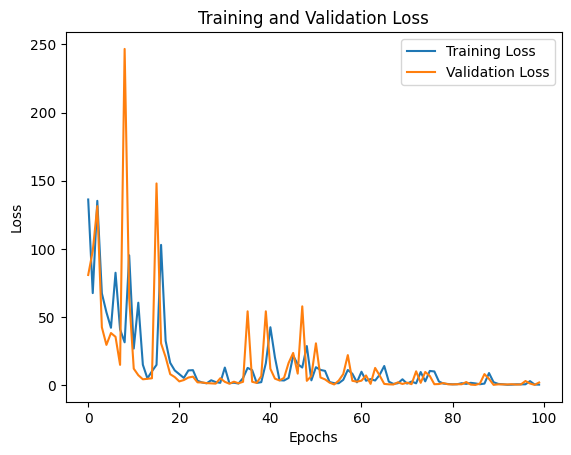

Train Loss: 5.7601518630981445
Validation Loss: 2.1220223903656006
Test Loss: 6.725804805755615


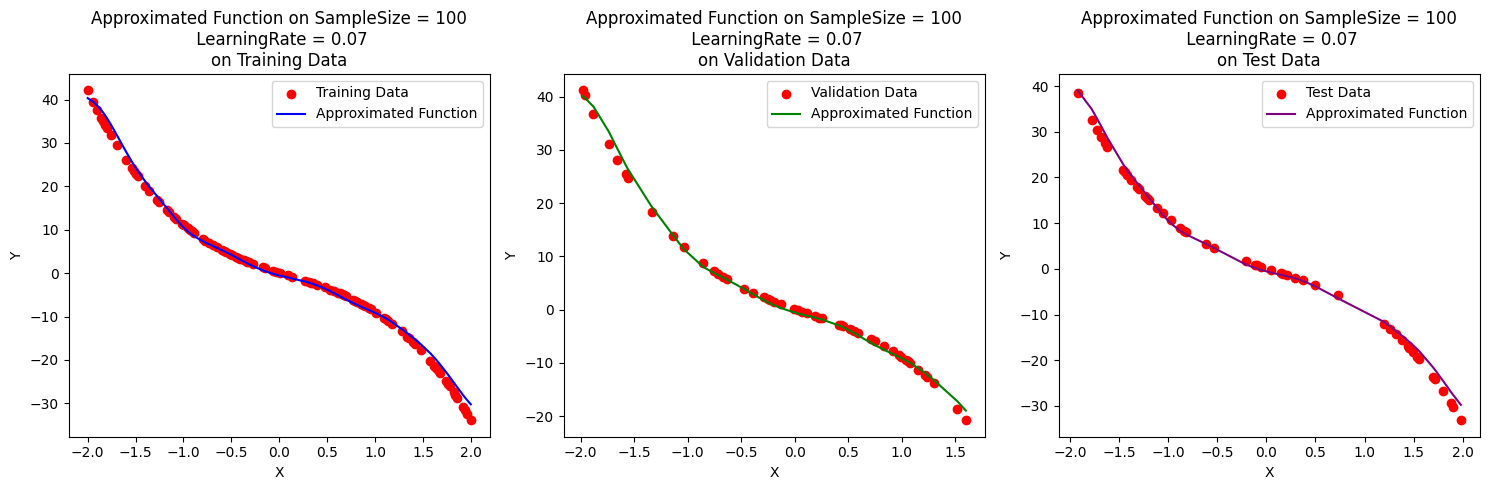

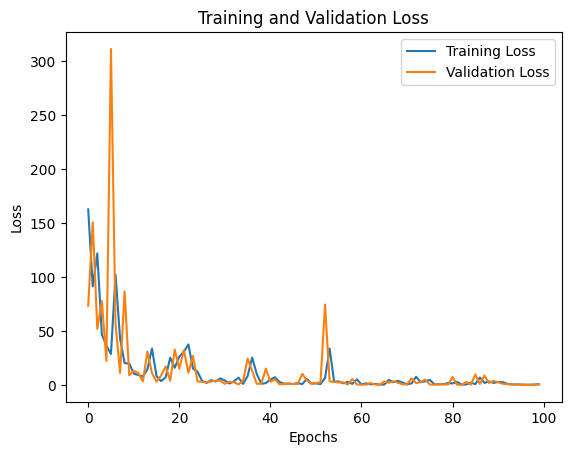

Train Loss: 3.362370491027832
Validation Loss: 0.6564841866493225
Test Loss: 1.9898550510406494


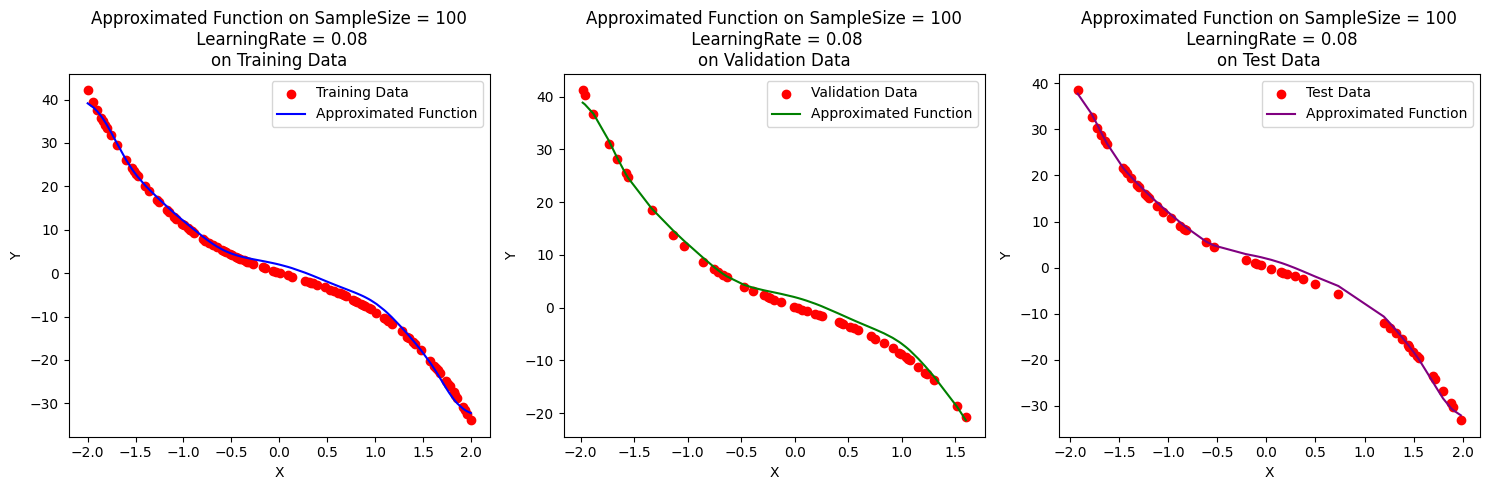

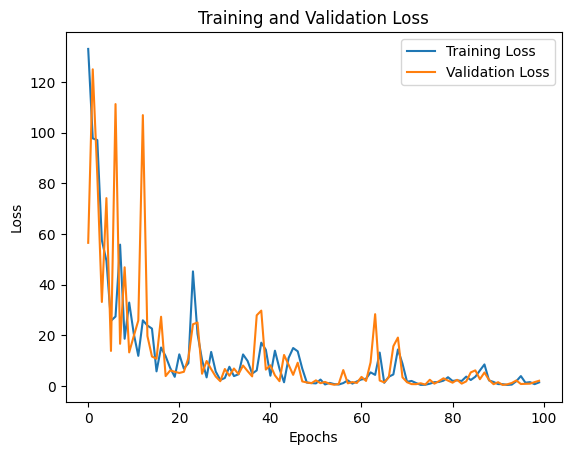

Train Loss: 1.3604843616485596
Validation Loss: 2.121617317199707
Test Loss: 1.1775792837142944


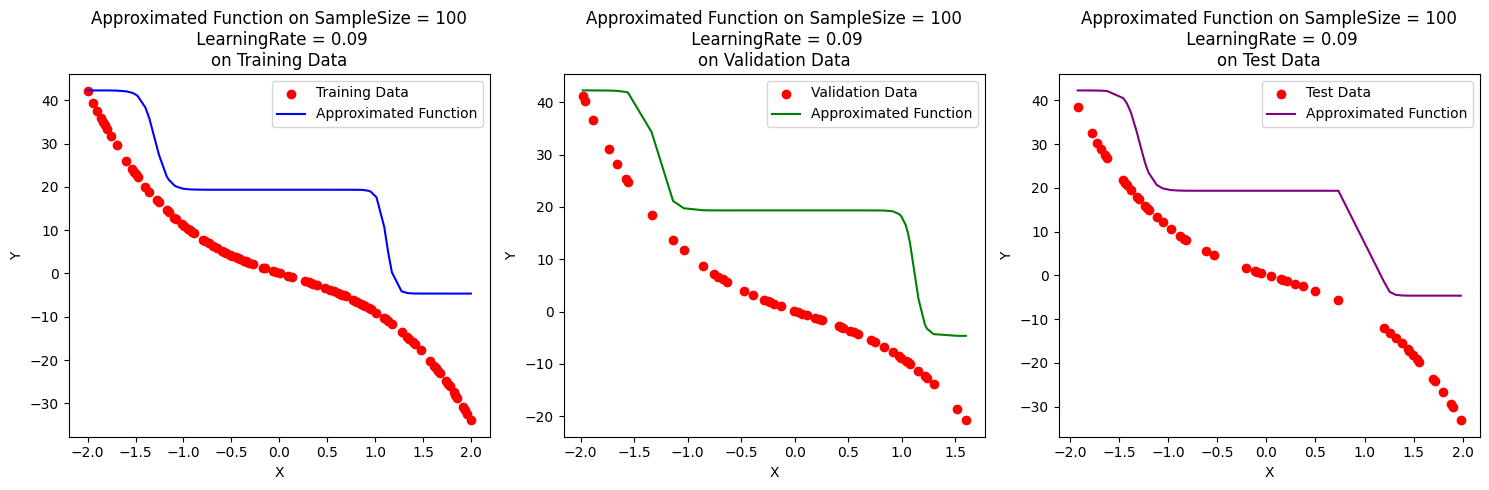

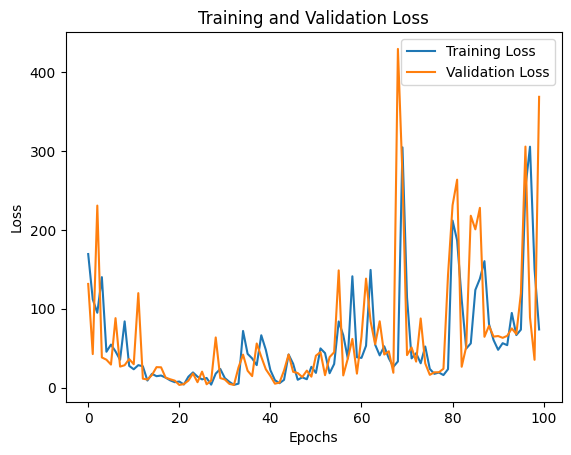

Train Loss: 422.62066650390625
Validation Loss: 369.03460693359375
Test Loss: 288.69683837890625


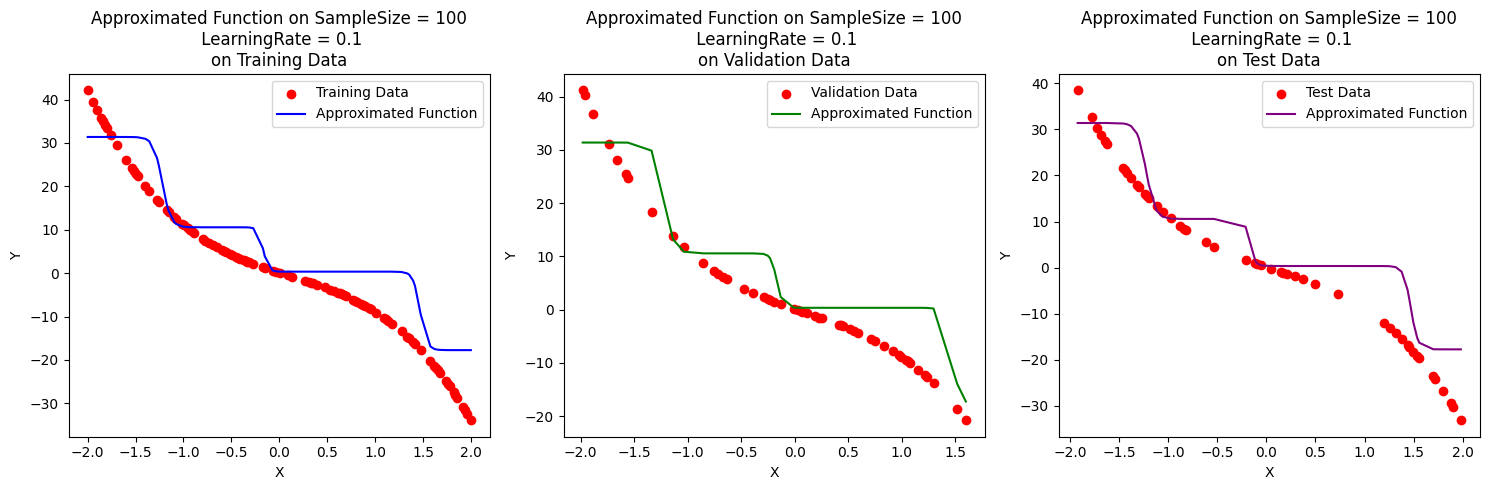

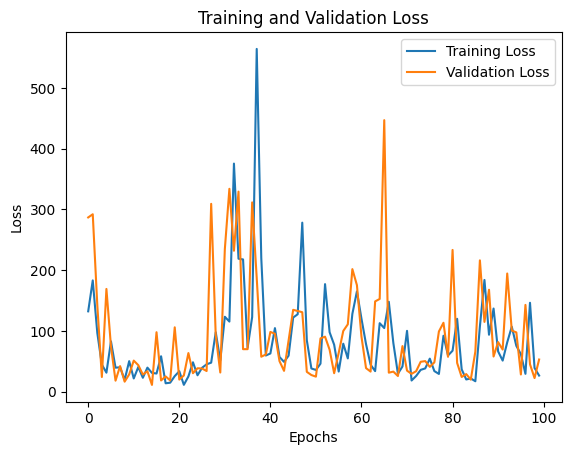

Train Loss: 88.62242126464844
Validation Loss: 52.733253479003906
Test Loss: 65.45574188232422
Index Sample Size  Learning Rate  Train Erms  Validate Erms  Test Erms
    1          10           0.01   27.950669      20.983886  26.114757
    2          10           0.02   29.872185      21.842080  28.164971
    3          10           0.03   26.959288      19.062020  24.139322
    4          10           0.04   30.752492      22.238404  29.219547
    5          10           0.05   26.679576      18.870918  23.672875
    6          10           0.06   26.851036      18.840950  24.007079
    7          10           0.07   27.379983      19.196306  24.257143
    8          10           0.08   26.914564      18.914504  23.948377
    9          10           0.09   29.885837      21.586375  27.980523
   10          10           0.10   26.547004      18.619294  24.361241
   11         100           0.01   24.648816      20.283104  25.876330
   12         100           0.02   26.079453      21.

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

column_names = [
    "Index",
    "Sample Size",
    "Learning Rate",
    "Train Erms",
    "Validate Erms",
    "Test Erms",
]
table_index = 0
table_df = pd.DataFrame(columns=column_names)


def add_data_to_table(sample_size, learning_rate, train_erms, validate_erms, test_erms):
    row_data = {}
    global table_df
    global table_index
    table_index = table_index + 1
    row_data["Index"] = table_index
    row_data["Sample Size"] = sample_size
    row_data["Learning Rate"] = learning_rate
    row_data["Train Erms"] = train_erms
    row_data["Validate Erms"] = validate_erms
    row_data["Test Erms"] = test_erms
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        table_df = pd.concat(
            [table_df, pd.DataFrame(row_data, index=[0])], ignore_index=True
        )


def print_table():
    print(table_df.to_string(index=False))

def get_N(x):
    N = len(x)
    return N

def get_erms(y, t):
    train_y_mse = tf.reduce_mean(tf.square(t-y))
    train_erms = np.sqrt(train_y_mse)
    return train_erms

def plot_loss(result):

    # Plot training loss
    plt.plot(result.history['loss'], label='Training Loss')
    plt.plot(result.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

def plot_data(x, y, pred_y, x_color, y_color, scatter_label, plot_label, x_label, y_label, plot_title, ax):
    
    ax.scatter(x, y, color=x_color, label=scatter_label)
    ax.plot(x, pred_y, color=y_color, label=plot_label)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(plot_title)
    ax.legend()
    # plt.show()

def plot_all_data(train_x, train_y, train_y_pred, val_x, val_y, val_y_pred, test_x, test_y, test_y_pred, sample_size, learning_rate):
    
    # Plotting
    fig = plt.figure(figsize=(15, 5))

    title = "Approximated Function on SampleSize = " + str(sample_size) + "\n LearningRate = " + str(learning_rate) + "\non "

    # Plot the approximated functions obtained using training data
    ax1 = fig.add_subplot(131)
    plot_data(train_x, train_y, train_y_pred, 'r', 'b', 'Training Data', 'Approximated Function', 'X', 'Y', title+'Training Data', ax1)

    # Plot the approximated functions obtained using validation data
    ax2 = fig.add_subplot(132)
    plot_data(val_x, val_y, val_y_pred, 'r', 'g', 'Validation Data', 'Approximated Function', 'X', 'Y', title+'Validation Data', ax2)
    
    # Plot the approximated functions obtained using test data
    ax3 = fig.add_subplot(133)
    plot_data(test_x, test_y, test_y_pred, 'r', 'purple', 'Test Data', 'Approximated Function', 'X', 'Y', title + 'Test Data', ax3)

    plt.tight_layout()
    plt.show()

def plot_graphs(train_x, train_y, val_x, val_y, test_x, test_y, sample_size, learning_rate=0.1):

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        # Define the model architecture
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(10, activation='tanh', input_shape=(1,)),
            tf.keras.layers.Dense(1, activation='linear')
        ])
    
    # Compile the model with the specified learning rate
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    
    # Train the model
    result = model.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=100, verbose=0)

    # Evaluate the model on train data
    train_loss = model.evaluate(train_x, train_y, verbose=0)
    # Evaluate the model on validation data
    val_loss = model.evaluate(val_x, val_y, verbose=0)
    # Evaluate the model on test data
    test_loss = model.evaluate(test_x, test_y, verbose=0)
    
    # Predict outputs for training, validation, and test data
    train_y_pred = model.predict(train_x, verbose=0)
    val_y_pred = model.predict(val_x, verbose=0)
    test_y_pred = model.predict(test_x, verbose=0)
    
    train_erms = get_erms(train_y_pred, train_y)
    validate_erms = get_erms(val_y_pred, val_y)
    test_erms = get_erms(test_y_pred, test_y)
    
    # Plot all the graphs
    plot_all_data(train_x, train_y, train_y_pred, val_x, val_y, val_y_pred, test_x, test_y, test_y_pred, sample_size, learning_rate)
     
    # Plot training loss
    plot_loss(result)

    add_data_to_table(sample_size, learning_rate, train_erms, validate_erms, test_erms)

    # Print train loss
    print("Train Loss:", train_loss)
    # Print validation loss
    print("Validation Loss:", val_loss)
    # Print test loss
    print("Test Loss:", test_loss)

    

def main():
    folder_number = "9"
    current_directory = os.getcwd()
    # regression_dataset_1_path=current_directory+ "/Datasets_for_A1/Regression/Dataset 1/"+folder_number+"/"
    regression_dataset_1_path = (
        "/home/dipendu/programs/mtech_2023/ml/ass2/Datasets_for_A1/Regression/Dataset 1/"
        + folder_number
        + "/"
    )

    regression_dataset_1_Train_Sample_1 = (
        regression_dataset_1_path + "Train-" + folder_number + "-Sample-1.csv"
    )
    df = pd.read_csv(regression_dataset_1_Train_Sample_1)
    data = df.to_numpy()
    sorted_data = data[data[:, 1].argsort()]
    train_x_1 = sorted_data[:, 1]
    train_y_1 = sorted_data[:, 2]

    regression_dataset_1_Train_Sample_2 = (
        regression_dataset_1_path + "Train-" + folder_number + "-Sample-2.csv"
    )
    df = pd.read_csv(regression_dataset_1_Train_Sample_2)
    data = df.to_numpy()
    sorted_data = data[data[:, 1].argsort()]
    train_x_2 = sorted_data[:, 1]
    train_y_2 = sorted_data[:, 2]


    regression_dataset_1_validation = (
        regression_dataset_1_path + "Val-" + folder_number + ".csv"
    )
    df = pd.read_csv(regression_dataset_1_validation)
    data = df.to_numpy()
    sorted_data = data[data[:, 1].argsort()]
    val_x = sorted_data[:, 1]
    val_y = sorted_data[:, 2]

    regression_dataset_1_test = (
        regression_dataset_1_path + "Test-" + folder_number + ".csv"
    )
    df = pd.read_csv(regression_dataset_1_test)
    data = df.to_numpy()
    sorted_data = data[data[:, 1].argsort()]
    test_x = sorted_data[:, 1]
    test_y = sorted_data[:, 2]

    accuracy_factor = 100.0
    iterations = 11

    sample_size = get_N(train_x_1)
    for i in range(1, iterations):
        learning_rate = i/accuracy_factor
        plot_graphs(
            train_x_1,
            train_y_1,
            val_x,
            val_y,
            test_x,
            test_y,
            sample_size,
            learning_rate,
        )

    sample_size = get_N(train_x_2)
    for i in range(1, iterations):
        learning_rate = i/accuracy_factor
        plot_graphs(
            train_x_2,
            train_y_2,
            val_x,
            val_y,
            test_x,
            test_y,
            sample_size,
            learning_rate,
        )

    print_table()


if __name__ == "__main__":
    main()